In [1]:
import json
import pandas as pd
import matplotlib
import os

In [2]:
def read_logs(fileName:str):
        log_path = os.path.join(os.path.abspath(''), "logs")
        with open(os.path.join(log_path, fileName), "r") as outfile:
                return json.load(outfile)

def create_aggregated_df(world_size: int):
        exp_df = []
        for rank in range(1, world_size + 1):
                if rank == 1:
                        rank_record = read_logs("rank_1.json")
                else:
                        rank_record = read_logs(f"rank_ddp_{rank}.json")
                exp_df.append(rank_record[0])
        return pd.DataFrame(exp_df)

exp_df = create_aggregated_df(7)
exp_df = exp_df.drop("epoch", axis=1)
exp_df

,experiment_key,training_loss,training_time,train_forward_pass,train_backward_pass,train_optimizer_step,train_post_processing,checkpointing,eval_validation_split_loss,eval_validation_split_perplexity,eval_time,eval_post_processing,eval_forward_pass,epoch_time,total_experiment_time
0,rank_1,3.168389,862.808604,221.466365,523.606467,8.335936,0.576413,15.872082,2.999401,20.073518,8.780048,0.004958,6.223922,887.460734,892.391252
1,rank_2,3.195714,435.509420,111.695451,264.768872,4.354529,0.344479,15.202761,3.018893,20.468898,4.846583,0.088729,3.486301,455.558764,466.253141
2,rank_3,3.206328,291.217091,75.170146,176.682444,2.963815,0.269703,15.255635,3.022949,20.552115,3.635025,0.024611,2.753952,310.107751,322.288305
3,rank_4,3.216707,219.509685,56.549870,132.850402,2.205632,0.198403,16.293393,3.029438,20.689044,2.959700,0.019406,2.293712,238.762777,252.186212
4,rank_5,3.226476,175.582499,46.933250,105.488938,1.563509,0.155181,15.675520,3.028158,20.664510,2.818983,0.075151,2.251828,194.077003,210.427583
5,rank_6,3.236998,146.725456,38.733284,88.320394,1.413714,0.143461,15.548673,3.029922,20.704916,2.650473,0.062674,2.180546,164.924602,182.985405
6,rank_7,3.246309,127.564351,34.483277,76.485691,1.123728,0.149506,15.634220,3.031667,20.734278,2.810978,0.072197,2.379818,146.009549,165.590063


In [3]:
exp_df.columns

Index(['experiment_key', 'training_loss', 'training_time',
       'train_forward_pass', 'train_backward_pass', 'train_optimizer_step',
       'train_post_processing', 'checkpointing', 'eval_validation_split_loss',
       'eval_validation_split_perplexity', 'eval_time', 'eval_post_processing',
       'eval_forward_pass', 'epoch_time', 'total_experiment_time'],
      dtype='object')

In [4]:
df_total_experiment_time = exp_df[['experiment_key', 'total_experiment_time']].groupby(by="experiment_key").max()
df_total_experiment_time.head()

,total_experiment_time
experiment_key,
rank_1,892.391252
rank_2,466.253141
rank_3,322.288305
rank_4,252.186212
rank_5,210.427583


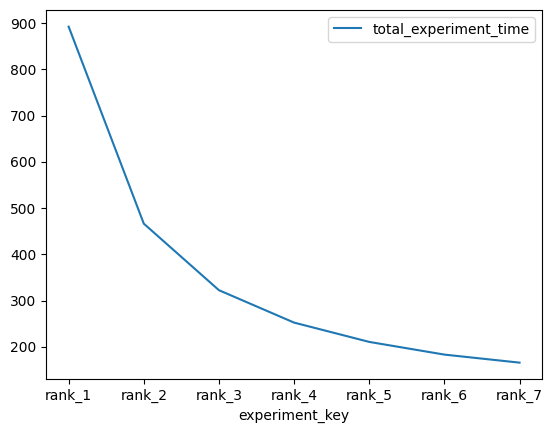

In [5]:
ax = df_total_experiment_time[['total_experiment_time']].plot()